# ***Actividad 5: Uso de software para búsqueda***

Nombre: Jean Carlos Javier Rubio Camarillo.
Matricula: 2016184
Hora: N4

Empezamos por declarar las librerias a utilizar

In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


Se importan los datos del MNIST

In [20]:
keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

Se le asignan los nombres a cada uno de los conjuntos de datos del 0 al 9

In [21]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']

Se explora el set de datos con el que se entrenara el modelo

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
len(y_train)

60000

In [24]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
x_test.shape

(10000, 28, 28)

In [26]:
len(y_test)

10000

Preprocesamiento de datos

<function matplotlib.pyplot.show(close=None, block=None)>

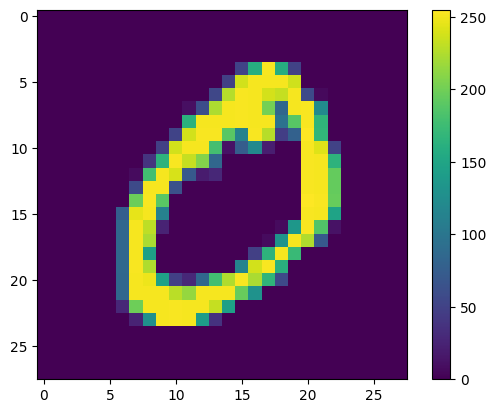

In [28]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show

In [29]:
x_train = x_train / 255.0
x_test = x_test / 255.0

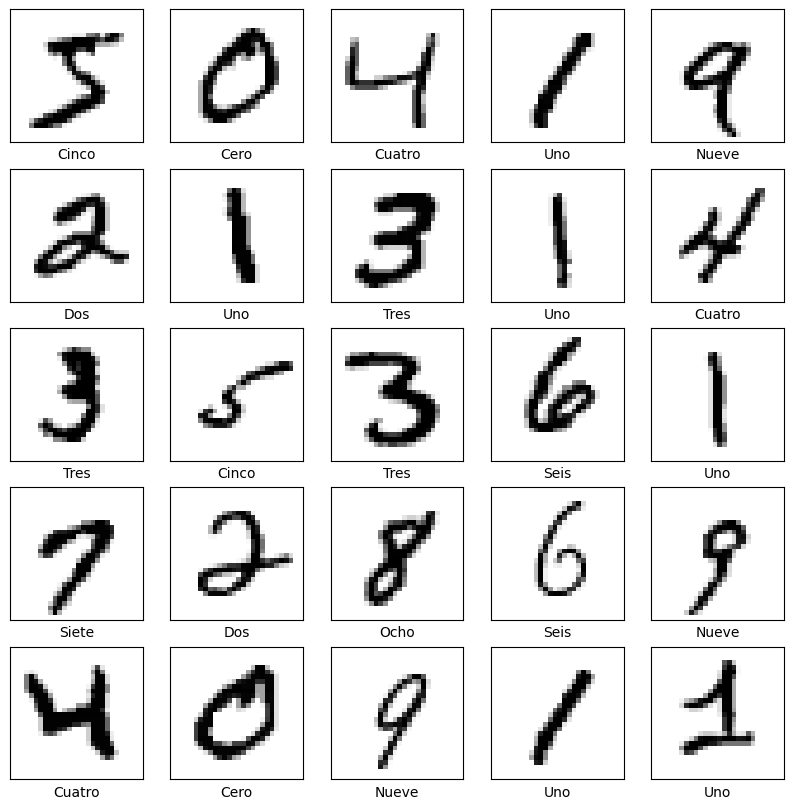

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

Se construye el modelo de red neuronal, donde se configuran las capas del modelo

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


Se compila el modelo entrenado

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Se entrena el modelo

In [33]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2592 - accuracy: 0.9263
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1144 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0769 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0570 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0427 - accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0348 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0265 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0230 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0181 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.014

Se evalua la exactitud del modelo

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0790 - accuracy: 0.9783 - 1s/epoch - 5ms/step

Test accuracy: 0.9782999753952026


Se empiezan a realizar las predicciones

In [35]:
predicciones = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Predicción 1

In [36]:
predicciones[0]

array([4.7517634e-08, 2.2634723e-09, 2.2674703e-08, 1.0028254e-04,
       3.0316963e-14, 4.0135431e-10, 4.7144059e-16, 9.9989945e-01,
       3.3081484e-08, 1.1948849e-07], dtype=float32)

In [37]:
np.argmax(predicciones[0])

7

In [38]:
y_test[0]

7

Predicción 2

In [39]:
predicciones[5]

array([2.6216505e-09, 9.9998909e-01, 7.5170987e-11, 1.1752883e-10,
       1.2752674e-06, 6.0008852e-11, 2.3547770e-11, 9.1306065e-06,
       3.9134852e-07, 9.9933251e-10], dtype=float32)

In [40]:
np.argmax(predicciones[5])

1

In [41]:
y_test[5]

1

Predicción 3

In [42]:
predicciones[9]

array([8.4092694e-13, 2.9507682e-15, 4.4821189e-14, 1.2409969e-09,
       3.5341643e-02, 5.5761884e-12, 3.8082680e-13, 9.3691269e-06,
       7.2618582e-07, 9.6464837e-01], dtype=float32)

In [43]:
np.argmax(predicciones[9])

9

In [44]:
y_test[9]

9

Predicción 4

In [45]:
predicciones[24]

array([3.6862282e-08, 6.4183780e-08, 2.4373545e-08, 2.6438240e-10,
       9.9786079e-01, 2.8164789e-06, 7.4096207e-08, 5.0407387e-05,
       4.3651312e-08, 2.0857893e-03], dtype=float32)

In [46]:
np.argmax(predicciones[24])


4

In [47]:
y_test[24]

4

Predicción 5

In [48]:
predicciones[3458]


array([9.9999911e-01, 8.6753182e-14, 1.0665631e-10, 1.9618610e-12,
       3.9167891e-10, 1.5334544e-09, 3.3504904e-07, 3.5785256e-08,
       1.6095823e-14, 4.9235354e-07], dtype=float32)

In [49]:
np.argmax(predicciones[3458])

0

In [50]:
y_test[3458]

0

Se grafica para poder ver todo el set de la prediccion de las 10 clases.

In [52]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Grafica de la predicción 1

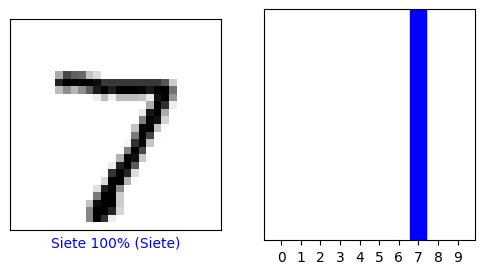

In [53]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Grafica predicción 2

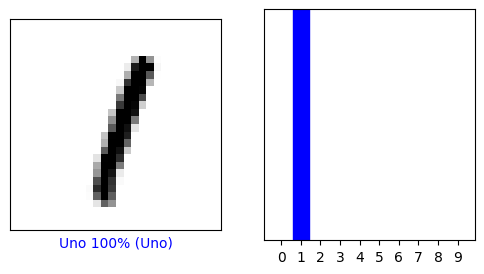

In [54]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Grafica predicción 3

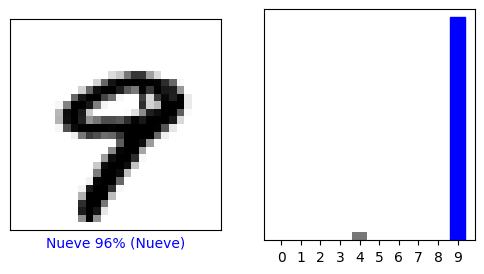

In [64]:
 i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Grafica prediccion 4

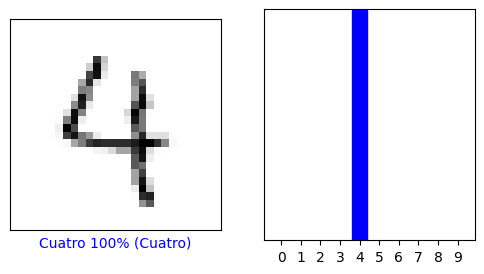

In [56]:
i = 24
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Grafica predicción 5

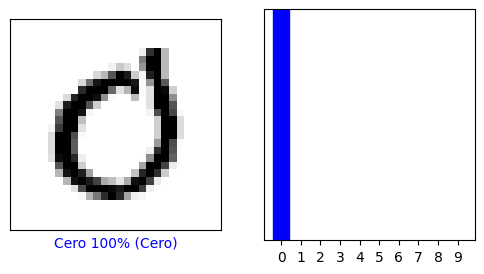

In [57]:
i = 3458
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones

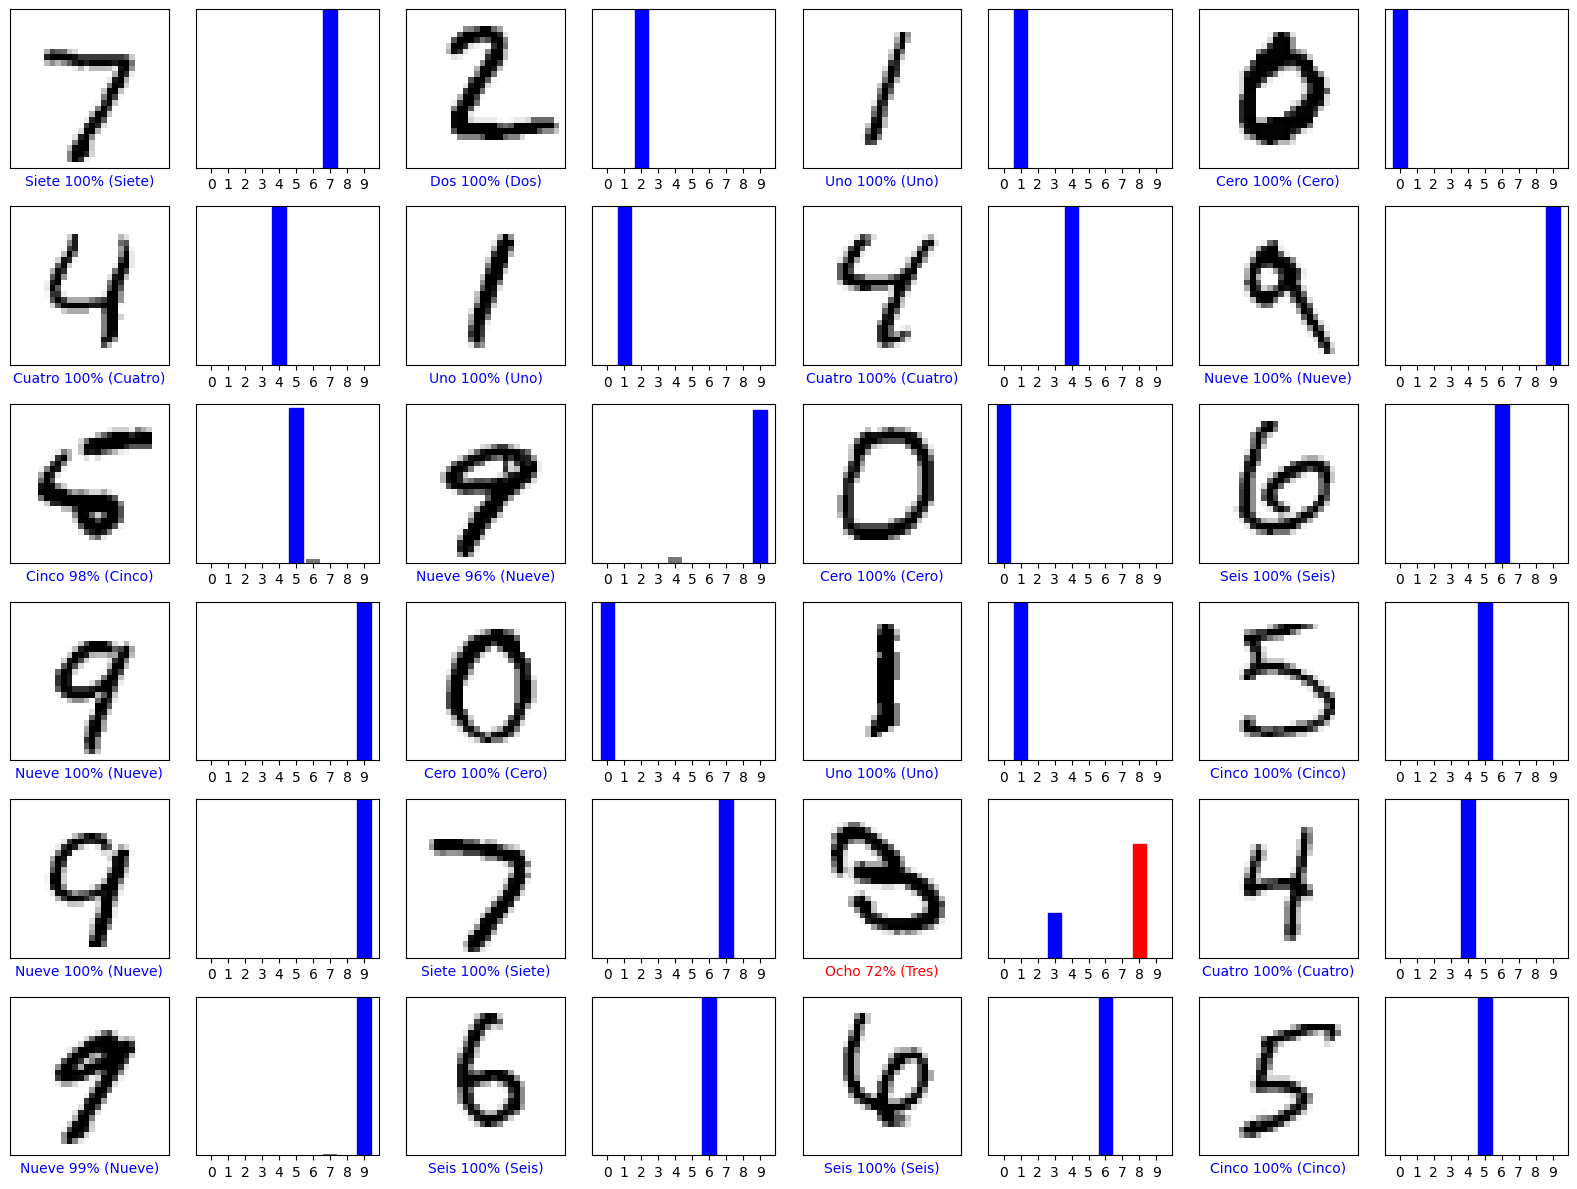

In [58]:
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predicciones[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predicciones[i], y_test)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [59]:
img = x_test[1]
print(img.shape)

(28, 28)


In [60]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [61]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[1.9026341e-11 2.3112267e-07 9.9999917e-01 8.9701363e-10 9.4858223e-20
  5.1767915e-07 1.5542374e-09 4.9136574e-20 1.6239333e-07 1.2894969e-12]]


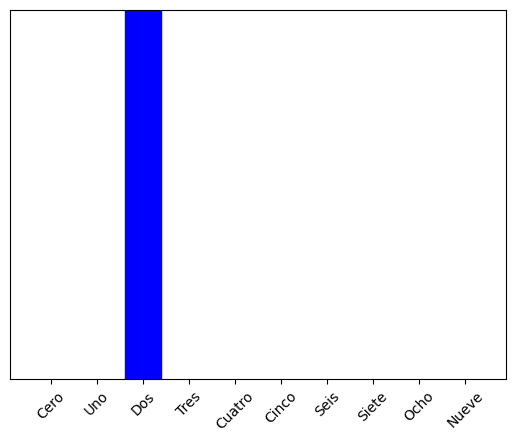

In [62]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [63]:
np.argmax(predictions_single[0])

2